In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
register_dict = {
    "R0":"00000",
    "R1":"00001",
    "R2":"00010",
    "R3":"00011",
    "R4":"00100",
    "R5":"00101",
    "R6":"00110",
    "R7":"00111",
    "R8":"01000",
    "R9":"01001",
    "R10":"01010",
    "R11":"01011",
    "R12":"01100",
    "R13":"01101",
    "R14":"01110",
    "R15":"01111",
    "R16":"10000",
    "R17":"10001",
    "R18":"10010",
    "R19":"10011",
    "R20":"10100",
    "R21":"10101",
    "R22":"10110",
    "R23":"10111",
    "R24":"11000",
    "R25":"11001",
    "R26":"11010",
    "R27":"11011",
    "R28":"11100",
    "R29":"11101",
    "R30":"11110",
    "R31":"11111"

}
def getval(d,i):
  return d[i]

type_dict = {
    "add": "01100",
    "addi": "00100",
    "sub": "01100",
    "lw": "00000",
    "beq": "11000",
    "and": "01100",
    "or": "01100",
    "sw": "01000",
    "LOADNOC": "11001",
    "STORENOC": "11011",
    "sll": "01100",
    "sra": "01100"
}
dict_1 = {
    "sub": "01000",
    "add": "00000"
}

dict_2 = {
    "and":"111",
    "sll":"001",
    "or":"110"
}

def encode_instruction(instruction):
    l = instruction.split()
    if (getval(type_dict,l[0]) == "0"+"1"*2+"0"*2):
        if l[0] in dict_1.keys():
            return getval(dict_1,l[0]) + "00" +  str(getval(register_dict,l[3])) + str(getval(register_dict,l[2])) + "000" + str(getval(register_dict,l[1])) + "0110011"
        elif l[0] in dict_2.keys():
            return "0"*5 + "0"*2 + str(getval(register_dict,l[3])) + str(getval(register_dict,l[2])) + str(getval(dict_2,l[0])) + str(getval(register_dict,l[1]))+ "0"+"1"*2+"0"*2+"1"*2
        else:
            return "01"+"0"*5+ str(getval(register_dict,l[3]))+ str(getval(register_dict,l[2])) + "101" + str(getval(register_dict,l[1])) + "0"+"1"*2+"0"*2+"1"*2
    elif (getval(type_dict,l[0]) == "1"*2+"0"*3):
        offset = l[3]
        offset = label_dict[offset]
        offset = format(offset,'012b') 
        return offset[0] + offset[2:8] + getval(register_dict,l[2]) + getval(register_dict,l[1]) + "0"*3 + offset[8:] + offset[1] + "1"*2+"0"*3+"1"*2
    elif (getval(type_dict,l[0]) == "0"*2+"1"+"0"*2):
        imm = l[3]
        var=format(int(imm),'012b')
        string = str(var) + str(getval(register_dict,l[2])) + "0"*3 + str(getval(register_dict,l[1])) + "0"*2+"1"+"0"*2+"1"*2
        return string
    elif (getval(type_dict,l[0]) == "0"*5):      
        offset = (l[2]).split("(")[0]
        offset = format(int(offset),'012b')
        r1 = (l[2]).split("(")[1].replace(")","")
        return str(offset) + str(getval(register_dict,r1)) + "010" + str(getval(register_dict,l[1])) + "0"*5+"1"*2
    elif (getval(type_dict,l[0]) =="01"+"0"*3):       
        offset = (l[2]).split("(")[0]
        offset = format(int(offset),'012b')
        r1 = (l[2]).split("(")[1].replace(")","")
        return str(offset[:7]) + str(getval(register_dict,l[1])) + str(getval(register_dict,r1)) + "010" + str(offset[7:]) + "01"+"0"*3+"1"*2
    elif (getval(type_dict,l[0]) == "1"*2+"0"+"1"*2):       
        return "0"*25 + "1"*2+"0"+"1"*4
    elif (getval(type_dict,l[0]) == "1"*2+"0"*2+"1"):     
        offset = l[3]
        offset = format(int(offset),'012b')
        return str(offset) + str(getval(register_dict,l[2])) + "0"*3 + str(getval(register_dict,l[1])) + "1"*2+"0"*2+"1"*3

label_dict = dict()
def main():
    lines = list()
    with open('drive/MyDrive/CA_test/test1.txt') as f:    
        for line in f:
            if line.isspace():
              continue
            else:
                lines.append(line.replace("\n", ""))
    print(lines)
    keys = type_dict.keys()
    line_number = 0
    for instr_line in lines:
        first_word = instr_line.split()[0]
        if first_word in keys:
          line_number+=1
          continue
        else:
          label_dict[first_word[:-1]] = line_number
          line_number += 1
    
    final_binary_list = []
    for pc in range(len(lines)):
        instruction_line_string = lines[pc]
        if pc in label_dict.values():
            final_string = ""
            list1 = instruction_line_string.split()[1:]
            for i in list1:
                final_string += i + " "
            instruction_line_string=final_string[:-1]
        final_binary_list.append(encode_instruction(instruction_line_string))
    textfile = open("drive/MyDrive/CA_test/abcd.txt", "w")
    for element in final_binary_list:
        textfile.write(element + "\n")
    textfile.close()
    print(label_dict)
if __name__ == "__main__":
    main()

['addi R4\tR0 9', 'lw R5 0(R0)', 'add\tR5 R5 R4', 'and\tR0 R2 R6', 'or R4 R9 R10', 'add R10 R12 R14', 'beq R15 R13 br1', 'addi R15 R12 5', 'add R28 R25 R24', 'br1: sll R20 R21 R26', 'sw R30 0(R5)', 'lw R16 0(R20)', 'LOADNOC R5 R10 7', 'STORENOC', 'sra R30 R24 R30', 'sll\tR30 R31\tR20']
{'br1': 9}


Enter the value of delay for data memory - 

1
Enter the value of delay for Instruction memory - 

1

FFDXMW

  FFDXMMW

    FFDDXMW

      FFDXMW

        FFDXMW

          FFDXMW

            FFDXMW

              FF- - - - 

- - - - - 

                FFDXMW

                  FFDXMMW

                    FFDXMMW

                      FFDXMMW

                        FFDXMMW

                          FFDXMW

                            FFDXMW
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 10, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

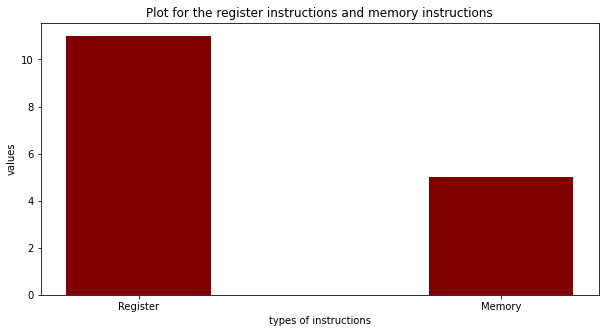

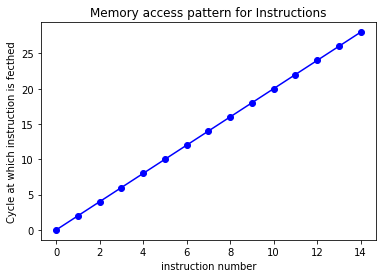

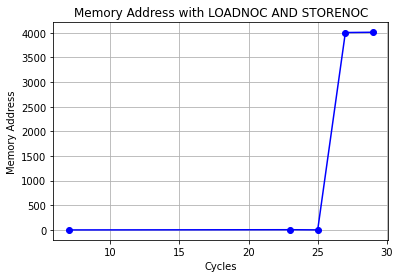

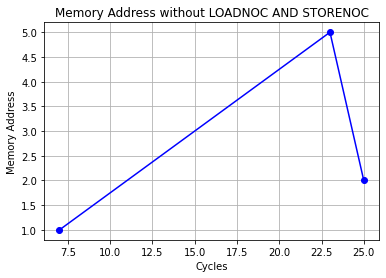

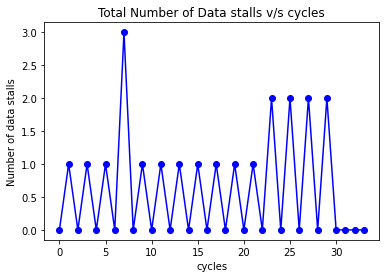

In [25]:
import pdb 
import matplotlib.pyplot as plt
import numpy as np
class Inst_Mem : 
    def __init__(self,i_delay):
        self.i_delay=i_delay
        self.memory = list()
    
    def initialize(self):
        with open('drive/MyDrive/CA_test/abcd.txt') as b:
            for line in b:
                self.memory.append(line)
        return len(self.memory)
    
    def getData(self,row):
        return self.memory[row]

    
        
class Data_Mem:
  def __init__(self,d):
    self.RF=[1]*32
    self.arr=[0]*1000
    self.d_delay=d
    for i in range(0,1000):
      self.arr[i]=i
    self.mem_addr={}
    for i in self.arr:
      self.mem_addr[i]=0

  def getdata(self,i):
    return self.RF[i]


  
PC = 0

mem_reg ={"4000":0, "4004":0, "4008":0, "400c":0,"4010":0}
register_dict = {
    "00000":0,
    "00001":1,
    "00010":2,
    "00011":3,
    "00100":4,
    "00101":5,
    "00110":6,
    "00111":7,
    "01000":8,
    "01001":9,
    "01010":10,
    "01011":11,
    "01100":12,
    "01101":13,
    "01110":14,
    "01111":15,
    "10000":16,
    "10001":17,
    "10010":18,
    "10011":19,
    "10100":20,
    "10101":21,
    "10110":22,
    "10111":23,
    "11000":24,
    "11001":25,
    "11010":26,
    "11011":27,
    "11100":28,
    "11101":29,
    "11110":30,
    "11111":31,
}

type_dict = {
    "add": "01100",
    "addi": "00100",
    "sub": "01100",
    "lw": "00000",
    "sw": "01000",
    "LOADNOC": "11001",
    "STORENOC": "11011",
    "beq": "11000",
    "and": "01100",
    "or": "01100",
    "sll": "01100",
    "sra": "01100"
}

def is_in_use(p_inst,c_inst):
      rd_p = register_dict[p_inst[20:25]]
      rs1_c= register_dict[c_inst[12:17]]
      rs2_c= register_dict[c_inst[7:12]]
      rd_c= register_dict[c_inst[20:25]]
      if((rd_p==rs1_c or rd_p==rd_c)):
        return True
      else:
        False

memcyc = []
memcyc1 = []
memaddr =[]
memaddr1 = []
flag=0
class instructions:

  def __init__(self,instr,dmem,imem):
      self.f_start=-1
      self.f_end=-1
      self.d_start=-1
      self.d_end=-1
      self.x_start=-1
      self.x_end=-1
      self.m_start=-1
      self.m_end=-1
      self.w_start=-1
      self.instr=instr
      self.dmem=dmem
      self.imem=imem
      self.temp=0
      self.flag=False
      #str1=str(self.f_start)+" "+str(self.f_end)+" "+str(self.d_start)+" "+str(self.d_end)+" "+str(self.x_start)+" "+str(self.m_start)+" "+str(self.w_start)
      #print(str1)

  def execute(self,prev,is_branch=False):
      if(is_branch):
        self.f_start=prev.x_end+1
        self.f_end=self.f_start+self.imem.i_delay
        self.d_start=self.f_end+1
        self.d_end=self.d_start
        self.x_start=self.d_start+1
        self.x_end=self.x_start
        self.m_start=self.x_end+1
        if(self.instr[25:30]=="00000" or self.instr[25:30]=="01000" or self.instr[25:30]=="11001" or self.instr[25:30]=="11011"):
          self.m_end=self.m_start+self.dmem.d_delay
        else:
          self.m_end=self.m_start
        self.w_start=self.m_end+1
        return

      if(prev.f_start==-1 or prev.d_start==-1):
        return
      self.f_start=prev.d_start
      #self.f_start=prev.f_end+1
      if(prev.instr[25:30]=="11000"):
        self.f_end=self.f_start+self.imem.i_delay
        flag=prev.x_end
        if(prev.x_end<self.f_end):
          self.f_end=prev.x_end 
        return
      else:
        self.f_end=self.f_start+self.imem.i_delay
      if(prev.x_start==-1):
        return 
      #self.d_start=prev.x_start+self.imem.i_delay
      self.d_start=self.f_end+1
      if(prev.instr[25:30]=="00000" or prev.instr[25:30]=="01000" or prev.instr[25:30]=="11001" or prev.instr[25:30]=="11011"): 
        if(is_in_use(prev.instr,self.instr)):
         self.d_end=prev.m_end
        else:
          #self.d_end=prev.x_end+self.imem.i_delay
          self.d_end=self.d_start
      elif(prev.instr[25:30]=="11000"):
        #self.d_end=prev.x_end
        self.d_end=self.d_start
        return
      else:
        #if(prev.x_end<=self.d_start):
        #  self.d_end=self.d_start
        #else:
          #self.d_end=prev.x_end+self.imem.i_delay
          self.d_end=self.d_start
      #self.x_start=self.d_end+1
      """if(prev.instr[25:30]=="00000" or prev.instr[25:30]=="01000" or prev.instr[25:30]=="11001" or prev.instr[25:30]=="11011"):
        if(is_in_use(prev.instr,self.instr)): 
          self.x_start= prev.m_end+1
        else:
          self.x_start= prev.m_start+self.imem.i_delay
      else:
        self.x_start=prev.m_end+self.imem.i_delay"""
      self.x_start=self.d_end+1
      if(prev.instr[25:30]=="00000" or prev.instr[25:30]=="01000" or prev.instr[25:30]=="11001" or prev.instr[25:30]=="11011"): 
        if(is_in_use(prev.instr,self.instr)): 
          #self.x_end= prev.m_end+1
          self.x_end= self.x_start
        else:
          self.x_end= prev.m_end
          #self.x_end=self.x_start
        
      else:
        #self.x_end=prev.m_end+self.imem.i_delay
        self.x_end=self.x_start

      self.m_start=self.x_end+1

      if(self.instr[25:30]=="00000" or self.instr[25:30]=="01000" or self.instr[25:30]=="11001" or self.instr[25:30]=="11011"):
        self.m_end=self.m_start+self.dmem.d_delay
      else:
        self.m_end=self.m_start
      self.w_start=self.m_end+1
      return


stalls=[]
cycles=[]
fetch=[]

class CPU:

    def __init__(self,list_of_inst,inst_mem,data_mem):
        self.dmem = data_mem
        self.W = Wb()
        self.imem = inst_mem
        self.l = list_of_inst
        self.cycles=list_of_inst[-1].w_start
        self.X = E()
        self.M = M()
        self.F = F(self.imem,self.dmem)
        self.D = Decode(self.imem,self.dmem)
        
    def typeof(self,inst):
      if(inst[25:30]=="00000" or inst[25:30]=="01000"):
        return 0
      elif (inst[25:30]=="11000"):
        return 2
      else:
        return 1

    def calc_temp(self,l):
              for i in range(len(l)):
                temp=0
                if(self.typeof(l[i].instr)==1):
                  temp=l[i].x_end
                elif(self.typeof(l[i].instr)==2):
                  temp=l[i].x_end
                  offset=l[i].instr[0]+l[i].instr[24]+l[i].instr[1:7]+l[i].instr[20:24]
                  offset=int(offset,2)
                  jmp=offset
                elif(i>0 and self.typeof(l[i].instr)==0 and is_in_use(l[i-1].instr,l[i].instr)):
                  temp=l[i].m_end
                elif(self.typeof(l[i].instr)==0):
                  temp=l[i].x_end
                l[i].temp=temp

    def execute(self):
        jmp=0
        file1= open("drive/MyDrive/CA_test/log.txt","w")
        for i in range(self.cycles+1):
            #for every instruction
            #change
            string="Clock cycle -"+str(i)+"\n"
            file1.write(string)
            cycles.append(i)
            stalls.insert(i,0)
            fetch.insert(i,0)
            for j in range(len(self.l)):
              curr_inst=self.l[j]
              self.calc_temp(self.l)
              ## printing the instruction no that is executing in every cycle
              if(i<curr_inst.f_start or (curr_inst.f_start==-1 and curr_inst.flag==False)):
                s= "Instruction "+curr_inst.instr+" is not yet executed \n"
                file1.write(s)
              elif(i>=curr_inst.f_start and i<=curr_inst.f_end):
                if(curr_inst.f_start==i):
                  fetch[i]=1
                  s= "Instruction "+curr_inst.instr+" is in Fetch stage \n"
                  file1.write(s)
                elif(i>curr_inst.f_start):
                  s= "Instruction "+curr_inst.instr+" is stalled in Fetch stage \n"
                  file1.write(s)
                  stalls[i]+=1
              elif(i>=curr_inst.d_start and i<=curr_inst.d_end):
                  if(curr_inst.d_start==i):
                    s= "Instruction "+curr_inst.instr+" is in Decode stage \n"
                    file1.write(s)
                  elif(i>curr_inst.d_start):
                    s= "Instruction "+curr_inst.instr+" is stalled in Decode stage \n"
                    file1.write(s)
                    stalls[i]+=1
              elif(i>=curr_inst.x_start and i<=curr_inst.x_end):
                if(curr_inst.x_start==i):
                  s= "Instruction "+curr_inst.instr+" is in Execute stage \n"
                  file1.write(s)
                elif(i>curr_inst.x_start):
                  s= "Instruction "+curr_inst.instr+" is stalled in Execute stage \n"
                  file1.write(s)
                  stalls[i]+=1
                
              elif(i>=curr_inst.m_start and i<=curr_inst.m_end):
                if(curr_inst.m_start==i):
                  s= "Instruction "+curr_inst.instr+" is in Memory stage \n"
                  file1.write(s)
                elif(i>curr_inst.m_start):
                  s= "Instruction "+curr_inst.instr+" is stalled in Memory stage \n"
                  file1.write(s)
                  stalls[i]+=1
                if(i==curr_inst.m_end and(curr_inst.instr[25:30]=="00000" or curr_inst.instr[25:30]=="01000")):
                    memcyc1.append(curr_inst.m_end)
                if(i==curr_inst.m_end and (curr_inst.instr[25:30]=="00000" or curr_inst.instr[25:30]=="01000" or curr_inst.instr[25:30]=="11001" or curr_inst.instr[25:30]=="11011")):
                    memcyc.append(curr_inst.m_end)
                
              elif(i==curr_inst.w_start):
                s= "Instruction "+curr_inst.instr+" is in Writeback stage \n"
                file1.write(s)
              elif(curr_inst.x_start==curr_inst.m_start and i>=flag):
                self.flag=True
                self.l[j+1].flag=True
                s= "Instruction "+curr_inst.instr+" is killed \n"
                file1.write(s)
              elif(i>curr_inst.w_start or self.flag==True):
                s= "Instruction "+curr_inst.instr+" has executed succesfully \n"
                file1.write(s)

              if(i==curr_inst.temp):
                if(jmp==0):
                  self.F.execute(j,self.imem)
                  self.D.decode(self.F,j)
                  self.X.execute(self.D,j)
                  self.M.execute(self.X)
                  self.W.execute(self.M)   
                elif(jmp!=0 and j<=jmp):
                  continue
                elif(j==jmp):
                  self.F.execute(j,self.imem)
                  self.D.decode(self.F,j)
                  self.X.execute(self.D,j)
                  self.M.execute(self.X)
                  self.W.execute(self.M)
                  jmp=0
            ls=self.dmem.RF
            for k in ls:
              string=str(k)+"\n"
              file1.write(string)
            file1.write("\n")
            print(self.dmem.RF)

        for j in range(i,self.cycles+1):
          print(self.dmem.RF)  
          #print(self.cycles)

        print(mem_reg)

        file1.write("final data memory state \n")
        ls=self.dmem.mem_addr
        string=str(ls.values())+"\n"
        file1.write(string)
        file1.write("\n")
        file1.write("instruction memory state \n")
        ls=self.imem.memory
        for k in ls:
          string=str(k)+"\n"
          file1.write(string)
        file1.write("\n")
        file1.close()

        
class F:
    def __init__(self,imem,dmem):

        self.dmem=dmem
        self.instruc = 0
        self.imem=imem
    
    def typeof(self,inst):
      #print(inst)
      if(inst[25:30]=="00000" or inst[25:30]=="01000"):
        return 0
      elif (inst[25:30]=="11000"):
        return 2
      else:
        return 1

    def execute(self,PC,imem):
        self.instruc=imem.getData(PC)

    def sendToDecode(self):
        return self.instruc

class Decode:
    def __init__(self,imem,dmem):
        self.dmem = dmem
        self.rs2 = 0
        self.offset = 0
        self.F = F(imem,dmem)
        self.instruc = 0
        self.rs1 = 0
        self.imem = imem
        self.rd = 0
        self.op1 = 0
        self.imm = 0
        self.op2 = 0
        
    
    def typeof(self,inst):
      #print(inst)
      if(inst[25:30]=="00000" or inst[25:30]=="01000"):
        return 0
      elif (inst[25:30]=="11000"):
        return 2
      else:
        return 1

    def decode(self,F,PC):
        self.instruc = F.sendToDecode()
        self.rs2 = register_dict[self.instruc[7:12]]
        self.rs1 = register_dict[self.instruc[12:17]]
        self.rd = register_dict[self.instruc[20:25]]
        if(self.instruc[25:30]=="01100"):
            # add,sub,or,and,xor,sll,sra
            self.op1 = self.dmem.getdata(self.rs1)
            self.op2 = self.dmem.getdata(self.rs2)
        elif(self.instruc[25:30]=="11000"):
            self.offset = int(self.instruc[0]+self.instruc[24]+self.instruc[1:7]+self.instruc[20:24],2)
            self.op1 = self.dmem.getdata(self.rs1)
            self.op2 = self.dmem.getdata(self.rs2)
        elif(self.instruc[25:30]=="00000"):
            # load instruction
            self.offset = int(self.instruc[0:12],2)
            self.op1 = self.dmem.getdata(self.rs1)
        elif(self.instruc[25:30]=="01000"):
            # store instruction
            self.offset = int(self.instruc[0:7]+self.instruc[20:25],2)
            self.op1 = self.rs1
            self.op2 = self.dmem.getdata(self.rs2)
        elif(self.instruc[25:30]=="00100"):
            # add immediate(addi)
            self.op1 = self.dmem.getdata(self.rs1)
            self.imm = int(self.instruc[0:12],2)
        elif(self.instruc[25:30] == "11001"):
            self.op1 = self.dmem.getdata(self.rs1)
            self.op2 = 4000
            self.imm = int(self.instruc[0:12], 2)
        elif(self.instruc[25:30] == "11011"):
          return
    

    def sendToE(self):
        return (self.instruc, self.op1, self.op2, self.imm, self.offset, self.rd,self.imem,self.dmem)

class E:
    def __init__(self):
        self.op1 = 0
        self.offset = 0
        self.instruc = 0
        self.rd = 0
        self.op2 = 0
        self.res = 0
        self.imm = 0
        
    

    def typeof(self,inst):
      #print(inst)
      if(inst[25:30]=="00000" or inst[25:30]=="01000"):
        return 0
      elif (inst[25:30]=="11000"):
        return 2
      else:
        return 1

    def execute(self,D,PC):
        (self.instruc, self.op1, self.op2, self.imm, self.offset, self.rd,self.imem,self.dmem) = D.sendToE()
        self.compute(PC)

    def compute(self,PC):
        #add 
        if(self.instruc[0:7]=="0"*7 and self.instruc[17:20]=="0"*3 and self.instruc[25:32]=="0110011"):
          self.res = self.op1+self.op2
          # addi
        elif(self.instruc[17:20]=="0"*3 and self.instruc[25:32]=="0010011"):
          self.res = self.op1 + self.imm
          #sub
        elif(self.instruc[0:7]=="0100000" and self.instruc[17:20]=="0"*3 and self.instruc[25:32]=="0110011"):
          self.res = self.op1-self.op2
          #load
        elif(self.instruc[17:20]=="010" and self.instruc[25:32]=="0000011"):
          self.res = self.op1 + self.offset
          # store
        elif(self.instruc[17:20]=="010" and self.instruc[25:32]=="0100011"):
          self.res = self.op1 + self.offset
          #beq
        elif(self.instruc[17:20]=="000" and self.instruc[25:32]=="1100011"):
          if(self.dmem.getdata(self.op1)==self.dmem.getdata(self.op2)):
            PC+=self.offset
        #and
        elif(self.instruc[0:7]=="0"*7 and self.instruc[17:20]=="1"*3 and self.instruc[25:32]=="0110011"):
          self.res = self.op1 & self.op2
        #or
        elif(self.instruc[0:7]=="0"*7 and self.instruc[17:20]=="110" and self.instruc[25:32]=="0110011"):
          self.res = self.op1 | self.op2
        #sll
        elif(self.instruc[0:7]=="0"*7 and self.instruc[17:20]=="001" and self.instruc[25:32]=="0110011"):
          self.res = self.op1 << self.op2
        #sra
        elif(self.instruc[0:7]=="0100000" and self.instruc[17:20]=="101" and self.instruc[25:32]=="0110011"):
          self.res =  self.op1 >> self.op2
        
        if(self.instruc[17:20]=="000" and self.instruc[25:32]=="1100111"):
            if(self.imm//4 == 0):
              self.res = self.op2
            elif(self.imm//4 == 1):
              self.res = self.op2+4
            elif(self.imm//4 == 2):
              self.res = self.op2+8
            elif(self.imm//4 == 3):
              self.res = self.op2+12
            mem_reg[str(self.res)]=self.dmem.RF[self.rd]
            #memcyc.append(cycles[-1])
            memaddr.append(self.res)

        elif(self.instruc[25:32]=="1101111"):
            self.res = 1
            mem_reg["4010"] = 1
            memaddr.append(4010)

    def sendToM(self):
        return (self.instruc,self.res,self.rd,self.op2,self.op1,self.imem,self.dmem)    

class M:
    def __init__(self):
        self.loadval = 0
        self.instruc = 0
        self.rd=0
        self.res = 0
        self.op2 = 0
        self.op1 = 0
        
    def typeof(self,inst):
      #print(inst)
      if(inst[25:30]=="00000" or inst[25:30]=="01000"):
        return 0
      elif (inst[25:30]=="11000"):
        return 2
      else:
        return 1

    def execute(self,X):
        (self.instruc,self.res,self.rd,self.op2,self.op1,self.imem,self.dmem) = X.sendToM()
        if(self.instruc[25:30]=="01000"):
            # store
            self.dmem.mem_addr[self.dmem.RF[self.res]]=self.op2
            memaddr.append(self.res)
            memaddr1.append(self.res)
            #self.dmem.RF[self.res]= self.op2

        elif(self.instruc[25:30]=="00000"):
            # load
            #for loading value in memory
            self.loadval = self.dmem.mem_addr[self.dmem.RF[self.res]]
            memaddr.append(self.res)
            memaddr1.append(self.res)
            #self.loadval = self.dmem.RF[self.op2]
            
    
    def sendToWB(self):
        return (self.instruc,self.rd,self.res,self.loadval,self.imem,self.dmem)

class Wb:
    def __init__(self):
        self.loadval = 0
        self.instruc = 0
        self.res = 0
        self.rd = 0
        

    def typeof(self,inst):
      #print(inst)
      if(inst[25:30]=="00000" or inst[25:30]=="01000"):
        return 0
      elif (inst[25:30]=="11000"):
        return 2
      else:
        return 1

    def execute(self,M):
        (self.instruc,self.rd,self.res,self.loadval,self.imem,self.dmem) = M.sendToWB()
        if(self.instruc[25:30]=="01100" or self.instruc[25:30]=="00100" ):
            self.dmem.RF[self.rd] = self.res
        elif(self.instruc[25:30]=="00000"):
            self.dmem.RF[self.rd] = self.loadval 


def printpipe(list_of_inst):
  for i in range(0,len(list_of_inst)):
      obj = list_of_inst[i]
      str_line=" "*obj.f_start
      print()
      if(obj.f_start==-1):
        str_line="- "*5
        print(str_line)
        continue
      str_f="F"*(obj.f_end - obj.f_start + 1)
      str_line+=str_f
      if(obj.d_start==-1):
        str_line+="- "*4
        print(str_line)
        continue
      str_d="D"*(obj.d_end - obj.d_start + 1)
      str_line+=str_d
      if(obj.x_start==-1):
        str_line+="- "*3
        print(str_line)
        continue
      str_x="X"*(obj.x_end - obj.x_start +1)
      str_line+=str_x
      str_m="M"*(obj.m_end - obj.m_start + 1)
      str_line+=str_m
      str_w="W"
      str_line+=str_w
      print(str_line)
  pass

typeofinst={"Register":0,"Memory":0}

def plot_1(d):
  types_of_instructions=list(typeofinst.keys())
  value=list(typeofinst.values())
  fig = plt.figure(figsize = (10, 5))
  plt.bar(types_of_instructions, value, color ='maroon',width = 0.4)
  plt.xlabel("types of instructions")
  plt.ylabel("values")
  plt.title("Plot for the register instructions and memory instructions")
  plt.show()

#for instruction memory access pattern 
inst_number=[]
cyc=[]
def plot_2_a(fetch):
  k=0
  for i in range(len(fetch)):
    if(fetch[i]==1):
      cyc.insert(k,i)
      inst_number.insert(k,k)
      k+=1
  plt.plot(inst_number,cyc,'bo-')
  plt.xlabel("instruction number")
  plt.ylabel("Cycle at which instruction is fecthed")
  plt.title("Memory access pattern for Instructions")
  plt.show()
  

def plot_2_b():
  plt.plot(memcyc,memaddr,'bo-')
  plt.xlabel("Cycles")
  plt.ylabel("Memory Address")
  plt.title("Memory Address with LOADNOC AND STORENOC")
  plt.grid()
  plt.show()

  plt.plot(memcyc1,memaddr1,'bo-')
  plt.xlabel("Cycles")
  plt.ylabel("Memory Address")
  plt.title("Memory Address without LOADNOC AND STORENOC")
  plt.grid()
  plt.show()

def plot_3(stalls,cycles):
  plt.plot(cycles,stalls,'bo-')
  plt.xlabel("cycles")
  plt.ylabel("Number of data stalls")
  plt.title("Total Number of Data stalls v/s cycles")
  plt.show()

def main():
    print("Enter the value of delay for data memory - \n")
    d_delay= int(input())
    print("Enter the value of delay for Instruction memory - \n")
    i_delay = int(input())
    inst_mem = Inst_Mem(i_delay)    
    data_mem = Data_Mem(d_delay)
    PC = 0
    list_of_inst=[]
    no_of_instructions = inst_mem.initialize()

    for i in range(0,no_of_instructions):
      instruc = inst_mem.getData(i)
      i=instructions(instruc,data_mem,inst_mem)
      if((i.instr[25:30]=="00000" or i.instr[25:30]=="01000" or i.instr[25:30]== "11001" or i.instr[25:30]== "11011")):
        typeofinst["Memory"]+=1
      else:
        typeofinst["Register"]+=1
      list_of_inst.append(i)
    list_of_inst[0].f_start=0
    list_of_inst[0].f_end=i_delay
    list_of_inst[0].d_start=1+i_delay
    list_of_inst[0].d_end=list_of_inst[0].d_start
    list_of_inst[0].x_start=list_of_inst[0].d_end+1
    list_of_inst[0].x_end=list_of_inst[0].d_end+1
    list_of_inst[0].m_start=list_of_inst[0].x_end+1
    if((list_of_inst[0].instr[25:30]=="00000" or list_of_inst[0].instr[25:30]=="01000")):
      list_of_inst[0].m_end=list_of_inst[0].m_start+d_delay
    else:
      list_of_inst[0].m_end=list_of_inst[0].m_start
    list_of_inst[0].w_start=list_of_inst[0].m_end+1
    jmp=-1
    prev=-11
    for i in range(1,len(list_of_inst)):
      if(list_of_inst[i].instr[25:30]=="11000"):
        offset=list_of_inst[i].instr[0]+list_of_inst[i].instr[24]+list_of_inst[i].instr[1:7]+list_of_inst[i].instr[20:24]
        offset=int(offset,2)
        jmp=offset
        prev=i
        #print(jmp)
      if(jmp==i):
        list_of_inst[i].execute(list_of_inst[prev],True)
      else:
        list_of_inst[i].execute(list_of_inst[i-1])
      st=str(list_of_inst[i].f_start)+" "+str(list_of_inst[i].f_end)+" "+str(list_of_inst[i].d_start)+" "+str(list_of_inst[i].d_end)+" "+str(list_of_inst[i].x_start)+" "+str(list_of_inst[i].m_start)+" "+str(list_of_inst[i].w_start)
      #print(st)
    printpipe(list_of_inst)
    EX = CPU(list_of_inst,inst_mem,data_mem)
    #pdb.set_trace()
    EX.execute()
    plot_1(typeofinst)
    plot_2_a(fetch)
    plot_2_b()
    plot_3(stalls,cycles)

    pass
main()